In [ ]:
#   M         rak bor dgani
#   B         rak yo'q dgani
#   target diagnosis
#   feature diagnosis dan tashqari hammasi

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Get the uploaded filename
for filename in uploaded.keys():
    print('Uploaded file:', filename)
    df = pd.read_csv(filename)

# Show the first 5 rows
df.head()

Saving breast_cancer.csv to breast_cancer.csv
Uploaded file: breast_cancer.csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df = pd.read_csv('breast_cancer.csv')


In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df['diagnosis'].value_counts()
# 1 chi bolib targetti topib uni value counts qilamz va koramz ulani binary songa aylantirib olishimz kere
# keyin
# B 357
# M 212 turipti bulani bir xil son qse yaxshi boladi 357 ni kamaytirish kere yoki 212 ga kopeytirib bir xil qib qoyish kere
# imkon qadar muvonazat bolish kere bomasa 1 tomonga ogib ketishi mumkun

,count
diagnosis,
B,357
M,212


In [ ]:
# keremas columnlani delete qilamz  id ustuni keremas bizaga
df.drop('id', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
# diagnosis column ni binary qivolamz
# rak bor bosa 1 boladi . rak bomasa 0 boladi
def convert_diagnosis(value):
  if value == 'M':
    return 1
  else:
    return 0


df['diagnosis'] = df['diagnosis'].apply(convert_diagnosis)

In [ ]:
df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


In [ ]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')
# correlatsiya ni tekshirvommiza . abs esa sonladan - belgisini optashidi
# turli qiymatlani correlatsiyasini korib tekshirvommiza
# bizaga diagnosis dgan ustun muhim va uni rangi toq qizil
# targetimizga yani diagnosis ga qaysi biri yaqin
# qizilga yaqin rangdigila yani och qizil la correlatsiyasi baland

# kok rangdigila ni correlatsiyasi past



,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,0.012838,0.567134,0.008303,0.556141,0.548236,0.067016,0.292999,0.253730,0.408042,0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,0.679090,0.097317,0.674172,0.735864,0.222600,0.206000,0.194204,0.376169,0.104321,0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,0.691765,0.086761,0.693135,0.744983,0.202694,0.250744,0.228082,0.407217,0.081629,0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,0.732562,0.066280,0.726628,0.800086,0.166777,0.212583,0.207660,0.372320,0.072497,0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [ ]:
df.corrwith(df['diagnosis']).abs().sort_values(ascending=False)
# corrwith bn funksiya bn faqat bitta column uchun barcha value lani  correlatsiyasini korishimiz mumkun

,0
diagnosis,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


In [ ]:
# eng tepadigila correlatsiyasi balandla
# budushi da  malumotimiz kop bosa modelga hammasini o'qitadigan bose kop vaqt ketadi va ulani hamasi ham kere mas
# shunaqa payt faqat correlatsiyasi balandlani ozini o'qitse tez boladi va kereli malumot la boladi
# oshanaqa paytda man hammasini o'qitmimman faqat tepadan sanaganda 10 tasini yoki 15 ta columni o'qitse yetadi
# correlatsiya balandlani ozini o'qitish yetadi qogani yoki hammasini o'qitish shartmas
# 1 ga yaqinla correlatsiya balandla hisoblanadi

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, jaccard_score
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
x = df.drop('diagnosis', axis= 1)       # features
y = df['diagnosis']                     # target

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
# bo'tta faqat zip qilamz yani kickinalashtiramz faqat feature ni target keremas

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(x_train, y_train)
# modelimga o'qitvomman feature ni 80 % va targetni 80 % ni

KNeighborsClassifier(n_neighbors=11)

In [ ]:
prediction = classifier.predict(x_test) # feature ni 25 % berib tekshirvomman ishlashini

In [ ]:
print('percentage:', accuracy_score(y_test, prediction) * 100) # tepada ishlaganini manda bor to'ri javob bn tekshirvomman to'rimi yoki notorimi

percentage: 98.24561403508771


In [ ]:
print('confusion matrix:', confusion_matrix(y_test, prediction))

confusion matrix: [[68  1]
 [ 1 44]]


In [ ]:
print('jaccard score:', jaccard_score(y_test, prediction))

jaccard score: 0.9565217391304348


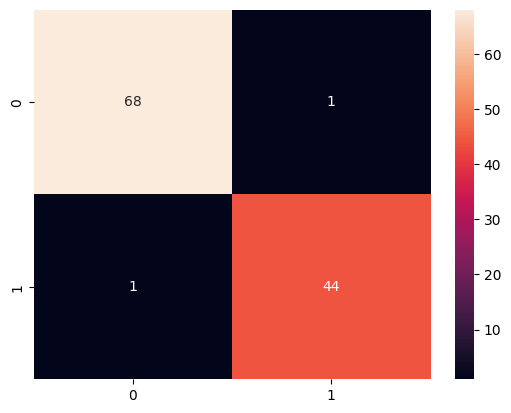

In [ ]:
sns.heatmap(confusion_matrix(y_test, prediction), annot=True)
plt.show()

In [ ]:
# 65 rak bomagan dgan tori topti va 4 ta rak emas didi lekn adashdi ula rak edi
# 44 rak bogan  tori topdi va 1 ta rak didi lekn adashdi u rak emas edi

In [ ]:
print('precision:', precision_score(y_test, prediction))
print('recall:', recall_score(y_test, prediction))
print('f1 score:', f1_score(y_test, prediction))

precision: 0.9777777777777777
recall: 0.9777777777777777
f1 score: 0.9777777777777777


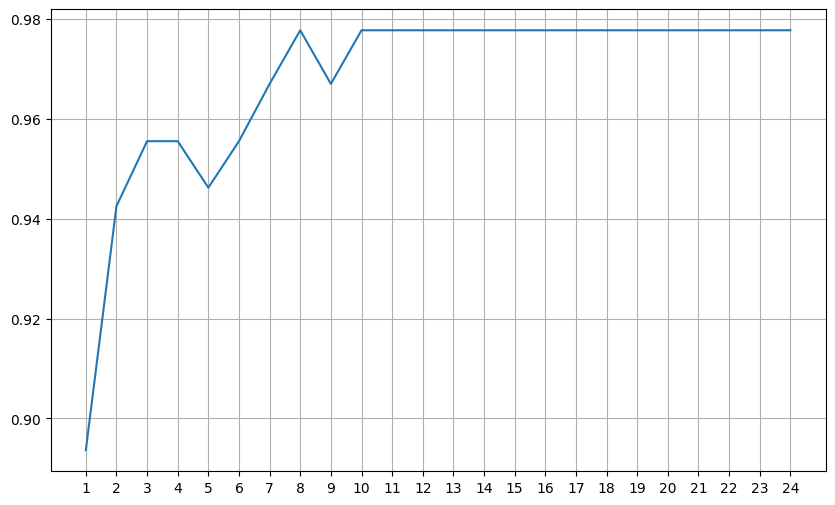

In [ ]:
f1 = []
for k in range(1, 25):
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(x_train, y_train)
  prediction = classifier.predict(x_test)
  f1.append(f1_score(y_test, prediction))


plt.figure(figsize=(10, 6))
plt.plot(range(1, 25), f1)
plt.xticks(range(1, 25))
plt.grid()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 25)}
classifier_gcsv = GridSearchCV(classifier, param_grid, cv=5)
classifier_gcsv.fit(x, y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {'n_neighbors': np.arange(1, 25)}

# knn_gscv = GridSearchCV(knn, param_grid, cv=5)

# knn_gscv.fit(X, y)

In [ ]:
classifier_gcsv.cv_results_['rank_test_score']

array([24, 23, 22, 19, 12, 20, 15, 13,  4, 13, 11,  4,  2,  1,  9,  7,  7,
        3,  9, 16,  6, 18, 17, 21], dtype=int32)

In [ ]:
classifier_gcsv.best_params_

{'n_neighbors': np.int64(14)}

In [ ]:
classifier_gcsv.best_score_

np.float64(0.935010091600683)